In [160]:
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import itertools
import statsmodels.api as sm
import warnings

In [161]:
# Directory where your images are stored
image_dir = 'dataset/downscaled/images'
mask_dir = 'dataset/downscaled/masks'

# List to store the images and masks
images = []
masks = []

# Load the images
for filename in os.listdir(image_dir):
    img = cv2.imread(os.path.join(image_dir, filename))
    if img is not None:
        images.append(img)

# Load the masks
for filename in os.listdir(mask_dir):
    mask = cv2.imread(os.path.join(mask_dir, filename), cv2.IMREAD_GRAYSCALE)
    if mask is not None:
        masks.append(mask)

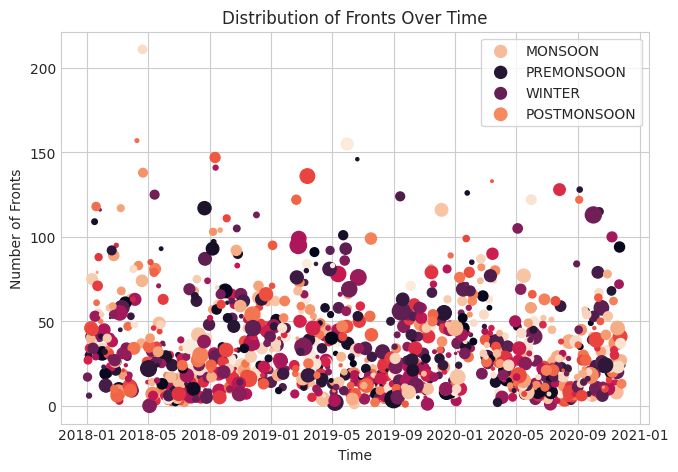

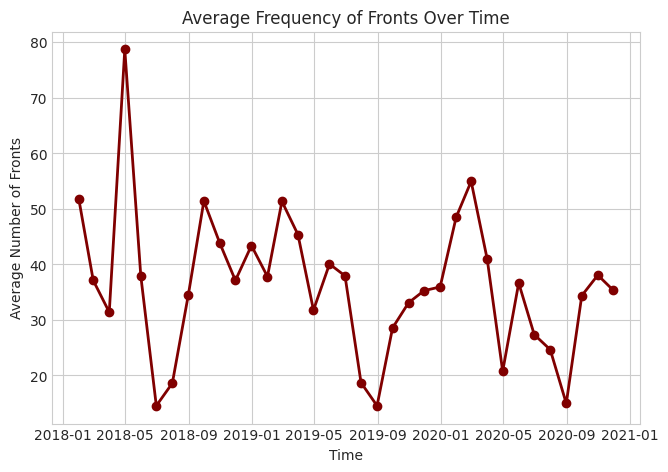

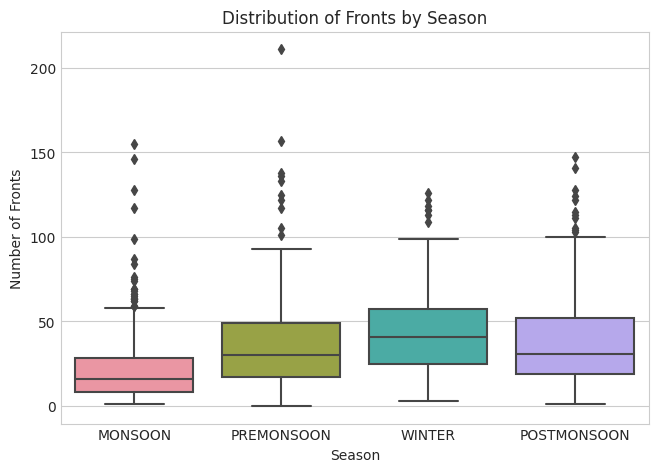

In [166]:
# Define a function to get the season for a given date
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'PREMONSOON'
    elif date.month in [6, 7, 8]:
        return 'MONSOON'
    elif date.month in [9, 10, 11]:
        return 'POSTMONSOON'
    else:
        return 'WINTER'

# List to store the number of fronts in each image
num_fronts = []
dates = []

for mask, filename in zip(masks, os.listdir(mask_dir)):
    # Label each separate region in the mask
    labeled_mask = label(mask)
    
    # The number of fronts is the maximum label value
    num_fronts.append(labeled_mask.max())
    
    # Extract the date from the filename and convert it to a datetime object
    date = pd.to_datetime(filename[:-4], format='%Y%m%d')
    dates.append(date)

# Create a DataFrame with the number of fronts and the corresponding dates
df = pd.DataFrame({
    'Date': dates,
    'Number of Fronts': num_fronts
})

# Set the date as the index
df.set_index('Date', inplace=True)

# Add a new column for the season
df['Season'] = df.index.map(get_season)

# Group by season and calculate the mean number of fronts
seasonal_avg = df.groupby('Season')['Number of Fronts'].mean()

# Create a new column for the color and size of each point
df['Color'] = np.random.randint(0, 50, len(df))
df['Size'] = np.abs(np.random.randn(len(df))) * 50

plt.figure(figsize=(6, 4))
for season in df['Season'].unique():
    plt.scatter(df[df['Season'] == season].index, df[df['Season'] == season]['Number of Fronts'], 
                c=df[df['Season'] == season]['Color'], s=df[df['Season'] == season]['Size'], label=season)
plt.xlabel('Time')
plt.ylabel('Number of Fronts')
plt.title('Distribution of Fronts Over Time')
plt.legend()
plt.show()

# Plot the average number of fronts over time
plt.figure(figsize=(6, 4))
plt.plot(monthly_avg.index, monthly_avg['Number of Fronts'], color='maroon', linewidth=2, marker='o')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Average Number of Fronts')
plt.title('Average Frequency of Fronts Over Time')
plt.show()

# Boxplot of the number of fronts by season
plt.figure(figsize=(6, 4))
sns.boxplot(x='Season', y='Number of Fronts', data=df)
plt.xlabel('Season')
plt.ylabel('Number of Fronts')
plt.title('Distribution of Fronts by Season')
plt.show()

In [164]:
# Apply seasonal decomposition
stl = STL(df['Number of Fronts'], seasonal=13)
stl_result = stl.fit()

# Increase the size of the plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Plot the original data
axes[0].plot(df.index, df['Number of Fronts'], marker='o', linestyle='-', color='maroon')
axes[0].set_title('Monthly Trends of Number of Fronts')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Number of Fronts (Monthly Mean)')
axes[0].grid(True)

# Plot the seasonal component, trend component, and residuals separately
axes[1].plot(stl_result.seasonal, linewidth=1, color='maroon')
axes[1].set_title('Seasonal Component')
axes[1].grid(True)

axes[2].plot(stl_result.trend, linewidth=1, color='maroon')
axes[2].set_title('Trend Component')
axes[2].grid(True)

axes[3].scatter(df.index, stl_result.resid, color='maroon')
axes[3].set_title('Residuals')
axes[3].grid(True)

# Adjust the spacing between the subplots
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Add a title
fig.suptitle('Seasonal Decomposition of Time series (STL)', fontsize=16)

plt.show()


ValueError: Unable to determine period from endog

Unable to determine period from endog. Please check your data and try again.


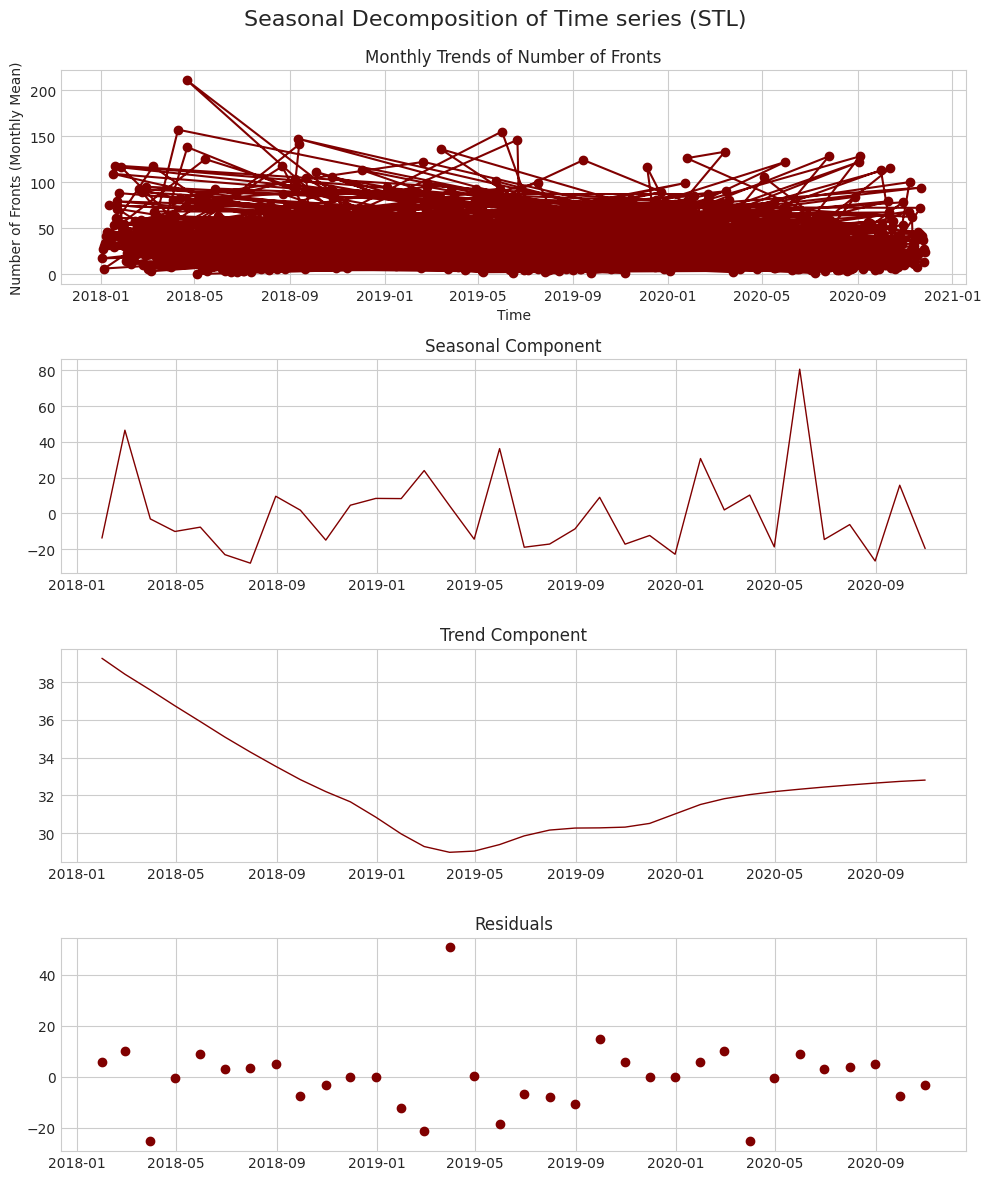

In [ ]:
# Apply seasonal decomposition
try:
    stl = STL(df['Number of Fronts'].dropna(), seasonal=91)  # drop missing values before STL
    stl_result = stl.fit()
except ValueError:
    print("Unable to determine period from endog. Please check your data and try again.")

# Increase the size of the plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

Plot the original data
axes[0].plot(df.index, df['Number of Fronts'], marker='o', linestyle='-', color='maroon')
axes[0].set_title('Monthly Trends of Number of Fronts')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Number of Fronts (Monthly Mean)')
axes[0].grid(True)
rame df with your data
df = pd.DataFrame(data, columns=["column1", "column2", "column3", "

# Plot the seasonal component, trend component, and residuals separately
axes[1].plot(stl_result.seasonal.index, stl_result.seasonal, linewidth=1, color='maroon')
axes[1].set_title('Seasonal Component')
axes[1].grid(True)

axes[2].plot(stl_result.trend.index, stl_result.trend, linewidth=1, color='maroon')
axes[2].set_title('Trend Component')
axes[2].grid(True)

axes[3].scatter(stl_result.resid.index, stl_result.resid, color='maroon')
axes[3].set_title('Residuals')
axes[3].grid(True)

# Adjust the spacing between the subplots
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Add a title
fig.suptitle('Seasonal Decomposition of Time series (STL)', fontsize=16)

plt.show()
